# Arima Model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/shampoo.csv', header=0, parse_dates=[0])

In [6]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


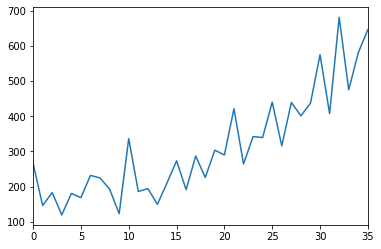

In [7]:
df['Sales'].plot()

Trend is Polynomial

D=2

## Autocorrelation Plot

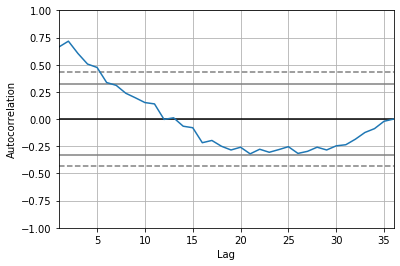

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

p=5, since line crossing after lag 5

## partial Autocorrealtion Graph

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

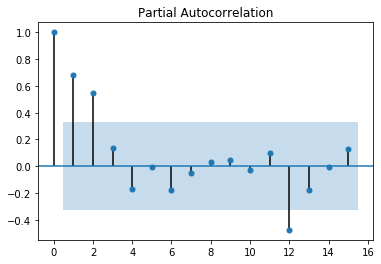

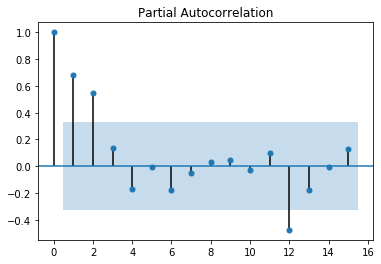

In [11]:
plot_pacf(df['Sales'], lags=15)

q=2

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
model = ARIMA(df['Sales'], order=(5, 2, 2))

In [20]:
model_fit = model.fit()

C:\Users\Aditya Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [21]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.352
Date:                Sat, 15 Aug 2020   AIC                            396.067
Time:                        20:02:46   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.001       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1231      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6012      0.478     -3.353      0.002      -2.537      -0.665
ar.L4.D2.Sales    -1.0317      0.409     -2.520      0.018      -1.834      -0.229
ar.L5.D2.Sales    -0.3193      0.193     -1.653      0.110      -0.698       0.059
ma.L1.D2.Sales    -0.0006      0.120     -0.005      0.996      -0.235       0.234
ma.L2.D2.Sales    -0.9994      0.119     -8.364      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1409           -1.3030j            1.3106           -0.2329
AR.2            0.1409           +1.3030j            1.3106            0.2329
AR.3           -1.1312           -0.4225j            1.2076           -0.4431
AR.4           -1.1312           +0.4225j            1.2076            0.4431
AR.5           -1.2502           -0.0000j            1.2502           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0006           +0.0000j            1.0006            0.5000
-----------------------------------------------------------------------------
"""

In [23]:
residuals = model_fit.resid

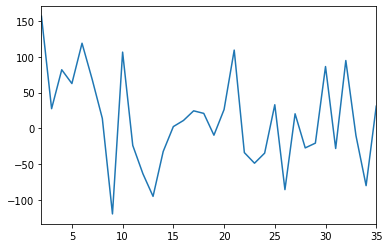

In [24]:
residuals.plot()

In [25]:
residuals.describe()

count     34.000000
mean      11.293801
std       65.989803
min     -119.298472
25%      -31.199461
50%       12.480484
75%       55.129230
max      156.383319
dtype: float64

## Variations
### ARIMA-
     model=ARIMA(d['Sales'], order=(q, d, p))
### Autoregression-
     model=ARIMA(d['Sales'], order=(q, d, 0))
### Moving Average-
    model=ARIMA(d['Sales'], order=(0, d, p))

In [27]:
output = model_fit.forecast()

In [29]:
output[0][0]

636.1042312242304

In [30]:
model_fit.forecast(5)

(array([636.10423122, 709.21893146, 664.2775505 , 771.1363476 ,
        761.53883277]),
 array([54.35220095, 55.30304518, 57.4647952 , 58.19196956, 60.28343006]),
 array([[529.57587488, 742.63258756],
        [600.82695467, 817.61090825],
        [551.64862153, 776.90647947],
        [657.08218307, 885.19051212],
        [643.385481  , 879.69218455]]))

## Walk Forward ARIMA

In [31]:
df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/shampoo.csv', header=0, parse_dates=[0])

In [32]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [33]:
train_size = int(df.shape[0]*0.7)

In [34]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [35]:
train.shape

(25,)

In [38]:
data = train
predict=[]
for t in test:
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data=np.append(data, t)
    data=pd.Series(data)

387.37647478263585
348.1542056973947
386.30881592483445
356.08200302442935
446.379450616756
394.737307675965
434.9154896262969
507.9234619160874
435.4827558938956
652.743801551763
546.3434835086496


In [39]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(test.values, predict)
mse

8119.12382940744

# SARIMA or Seasonal ARIMA
SARIMA(p, d, q)(P, D, Q)m

    . p: Trend autoregression order

    . d: Trend difference order

    . q: Trend moving average order

### Seasonal Elements
There are 4 seasonal elements that are not part of ARIMA that must be configured, they are
    P: Seasonal autoregressive order
    
    D: Seasonal difference order
        
    Q: Seasonal moving average order
        
    m: The number of time steps for a single seasonal period

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
df =pd.read_csv('C:/Users/Aditya Sharma/Desktop/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [10]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [11]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [12]:
df.index=df['Month']

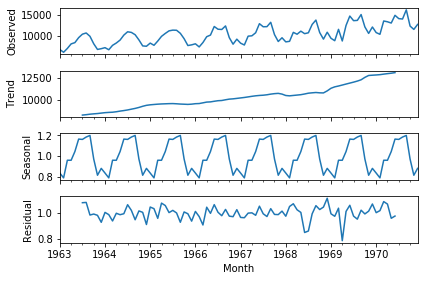

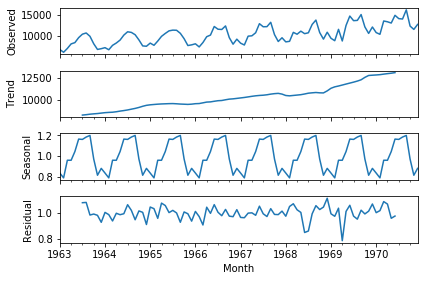

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [16]:
model = SARIMAX(df['MilesMM'], order=(5, 1, 3), seasonal_order=(1, 1, 1, 12))

C:\Users\Aditya Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [17]:
model_fit = model.fit()

C:\Users\Aditya Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Aditya Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Aditya Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
residuals=model_fit.resid

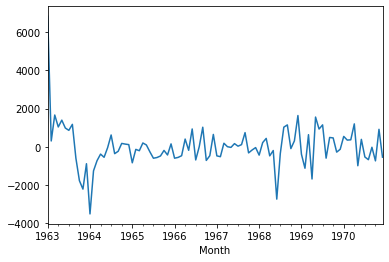

In [20]:
residuals.plot()

In [22]:
output = model_fit.forecast()

In [23]:
output

1971-01-01    11475.598269
Freq: MS, dtype: float64

In [24]:
model_fit.forecast(12)

1971-01-01    11475.598269
1971-02-01    11153.738811
1971-03-01    13669.873167
1971-04-01    12647.652932
1971-05-01    14338.861574
1971-06-01    15785.872491
1971-07-01    14979.057927
1971-08-01    15362.760960
1971-09-01    16962.723796
1971-10-01    13681.835100
1971-11-01    12426.627039
1971-12-01    13730.116277
Freq: MS, dtype: float64

In [25]:
yhat=model_fit.predict()

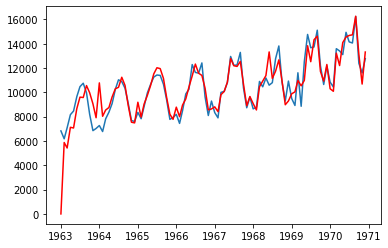

In [32]:
plt.plot(df['MilesMM'])
plt.plot(yhat, color='red')